In [2]:
import geopandas as gpd
import libpysal
import numpy as np 

###Carregar shapefile
shapefile_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\MT_Municipios_2022\MT_Municipios_2022.shp"
municipalities = gpd.read_file(shapefile_path)
municipalities

CD_MUN            NM_MUN SIGLA_UF   AREA_KM2  \
0    5100102          Acorizal       MT    850.763   
1    5100201          Água Boa       MT   7549.308   
2    5100250     Alta Floresta       MT   8955.410   
3    5100300     Alto Araguaia       MT   5402.308   
4    5100359    Alto Boa Vista       MT   2248.414   
..       ...               ...      ...        ...   
136  5108600         Vila Rica       MT   7436.383   
137  5108808      Nova Guarita       MT   1121.928   
138  5108857   Nova Marilândia       MT   1905.744   
139  5108907      Nova Maringá       MT  11553.479   
140  5108956  Nova Monte Verde       MT   5139.307   

                                              geometry  
0    POLYGON ((-56.38285 -15.20436, -56.38378 -15.2...  
1    POLYGON ((-51.89384 -14.16218, -51.89387 -14.1...  
2    POLYGON ((-55.89221 -9.43221, -55.8672 -9.4342...  
3    POLYGON ((-53.21098 -17.31781, -53.21116 -17.3...  
4    POLYGON ((-51.45325 -11.67644, -51.45313 -11.6...  
..                                                 ...  
136  POLYGON ((-51.0611 -10.25032, -51.06162 -10.25...  
137  POLYGON ((-55.43861 -10.39025, -55.43896 -10.3...  
138  POLYGON ((-57.00437 -14.41621, -57.0052 -14.41...  
139  POLYGON ((-56.89106 -13.19147, -56.89121 -13.1...  
140  POLYGON ((-57.4944 -10.26973, -57.49538 -10.26...  

[141 rows x 5 columns]

In [3]:
# Create the Queen contiguity matrix from the unique municipalities
W = libpysal.weights.Queen.from_dataframe(municipalities)

W

C:\Users\daves\AppData\Local\Temp\ipykernel_22964\9985370.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  W = libpysal.weights.Queen.from_dataframe(municipalities)


In [4]:
import pandas as pd
# Load data
file_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Regressão\Base de dados - Regressão.xlsx"
sheet_name = "Base de dados"
df = pd.read_excel(file_path, sheet_name=sheet_name)
df = df.rename(columns={'Annual Investment ': 'Annual Investment'})
print(df.columns)
df

Index(['Codigo', 'Município', 'Emancipation', 'Latitude', 'Longitude',
       'Mesorregião', 'NORDESTE MATO-GROSSENSE', 'NORTE MATO-GROSSENSE',
       'SUDESTE MATO-GROSSENSE', 'SUDOESTE MATO-GROSSENSE', 'Control',
       'Região imediata', 'Região intermediária', 'Ano', 'Production',
       'Productivity', 'PIA', 'Tangará da Serra', 'Diamantino', 'Cáceres',
       'Pontes e Lacerda - Comodoro', 'Mirassol D'oeste', 'Sinop', 'Sorriso',
       'Juína', 'Alta Floresta', 'Peixoto de Azevedo - Guarantã do Norte',
       'Juara', 'Barra do Garças', 'Confresa - Vila Rica', 'Água Boa',
       'Rondonópolis', 'Primavera do Leste', 'Jaciara', 'Control.1',
       'Int - Barra do Garças', 'Int - Cáceres', 'Int - Rondonópolis',
       'Int - Sinop', 'year1980', 'year1985', 'year1995', 'year2006',
       'Control.2', 'Occupied People', 'Temporary Tillage',
       'Permanently Tillage', 'Total Tillage', 'Productivity Land Unitilized',
       'Planted Pastages', 'Natural Pastages', 'Total Pastages',
 

Codigo                         Município  Emancipation   Latitude  \
0    5100102                          Acorizal          1953 -15.199491   
1    5100201                          Água Boa          1979 -14.057267   
2    5100250                     Alta Floresta          1976  -9.886111   
3    5100300                     Alto Araguaia          1938 -17.313918   
4    5100359                    Alto Boa Vista          1991 -11.673900   
..       ...                               ...           ...        ...   
700  5108352              Vale de São Domingos          1999 -15.295776   
701  5108402                     Várzea Grande          1948 -15.650000   
702  5108501                              Vera          1972 -12.305800   
703  5105507  Vila Bela da Santíssima Trindade          1752 -15.006425   
704  5108600                         Vila Rica          1978 -10.011900   

     Longitude                Mesorregião  NORDESTE MATO-GROSSENSE  \
0   -56.370149  CENTRO-SUL MATO-GROSSENSE                        0   
1   -52.161597    NORDESTE MATO-GROSSENSE                        1   
2   -56.087222       NORTE MATO-GROSSENSE                        0   
3   -53.215700     SUDESTE MATO-GROSSENSE                        0   
4   -51.387800    NORDESTE MATO-GROSSENSE                        1   
..         ...                        ...                      ...   
700 -59.065426    SUDOESTE MATO-GROSSENSE                        0   
701 -56.133333  CENTRO-SUL MATO-GROSSENSE                        0   
702 -55.316900       NORTE MATO-GROSSENSE                        0   
703 -59.950917    SUDOESTE MATO-GROSSENSE                        0   
704 -51.115800    NORDESTE MATO-GROSSENSE                        1   

     NORTE MATO-GROSSENSE  SUDESTE MATO-GROSSENSE  SUDOESTE MATO-GROSSENSE  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       1                       0                        0   
3                       0                       1                        0   
4                       0                       0                        0   
..                    ...                     ...                      ...   
700                     0                       0                        1   
701                     0                       0                        0   
702                     1                       0                        0   
703                     0                       0                        1   
704                     0                       0                        0   

     ...  Permanently Tillage Total Tillage Productivity Land Unitilized  \
0    ...             1001.210      4860.400                     43920.42   
1    ...                0.000         0.000                         0.00   
2    ...                0.000         0.000                         0.00   
3    ...              165.159      8594.239                     12506.92   
4    ...                0.000         0.000                         0.00   
..   ...                  ...           ...                          ...   
700  ...             5135.000      9672.000                          NaN   
701  ...              398.000       931.000                          NaN   
702  ...             1111.000     91352.000                          NaN   
703  ...             1230.000      7585.000                          NaN   
704  ...            57954.000     96413.000                          NaN   

     Planted Pastages  Natural Pastages  Total Pastages  Annual Investment  \
0                 0.0               0.0             0.0        3513.087399   
1                 0.0               0.0             0.0           0.000000   
2                 0.0               0.0             0.0           0.000000   
3                 0.0               0.0             0.0       16172.955573   
4                 0.0   

In [6]:
# Filter for year2006 == 1
df = df[df['year2006'] == 1]

# List of columns to drop
columns_to_drop = [
    'Control.1',
    'Int - Barra do Garças', 
    'Int - Cáceres', 
    'Int - Rondonópolis',
    'Int - Sinop', 
    'year1980', 
    'year1985', 
    'year1995', 
    'year2006',
    'Control.2', 
    'Região intermediária'
]

# Drop the columns 
df = df.drop(columns=columns_to_drop, errors='ignore')

# Reset index
df = df.reset_index(drop=True)

print(df.columns)
df

Index(['Codigo', 'Município', 'Emancipation', 'Latitude', 'Longitude',
       'Mesorregião', 'NORDESTE MATO-GROSSENSE', 'NORTE MATO-GROSSENSE',
       'SUDESTE MATO-GROSSENSE', 'SUDOESTE MATO-GROSSENSE', 'Control',
       'Região imediata', 'Ano', 'Production', 'Productivity', 'PIA',
       'Tangará da Serra', 'Diamantino', 'Cáceres',
       'Pontes e Lacerda - Comodoro', 'Mirassol D'oeste', 'Sinop', 'Sorriso',
       'Juína', 'Alta Floresta', 'Peixoto de Azevedo - Guarantã do Norte',
       'Juara', 'Barra do Garças', 'Confresa - Vila Rica', 'Água Boa',
       'Rondonópolis', 'Primavera do Leste', 'Jaciara', 'Occupied People',
       'Temporary Tillage', 'Permanently Tillage', 'Total Tillage',
       'Productivity Land Unitilized', 'Planted Pastages', 'Natural Pastages',
       'Total Pastages', 'Annual Investment', 'Capital Stock', 'Value of land',
       'TFP'],
      dtype='object')


Codigo                         Município  Emancipation   Latitude  \
0    5100102                          Acorizal          1953 -15.199491   
1    5100201                          Água Boa          1979 -14.057267   
2    5100250                     Alta Floresta          1976  -9.886111   
3    5100300                     Alto Araguaia          1938 -17.313918   
4    5100359                    Alto Boa Vista          1991 -11.673900   
..       ...                               ...           ...        ...   
136  5108352              Vale de São Domingos          1999 -15.295776   
137  5108402                     Várzea Grande          1948 -15.650000   
138  5108501                              Vera          1972 -12.305800   
139  5105507  Vila Bela da Santíssima Trindade          1752 -15.006425   
140  5108600                         Vila Rica          1978 -10.011900   

     Longitude                Mesorregião  NORDESTE MATO-GROSSENSE  \
0   -56.370149  CENTRO-SUL MATO-GROSSENSE                        0   
1   -52.161597    NORDESTE MATO-GROSSENSE                        1   
2   -56.087222       NORTE MATO-GROSSENSE                        0   
3   -53.215700     SUDESTE MATO-GROSSENSE                        0   
4   -51.387800    NORDESTE MATO-GROSSENSE                        1   
..         ...                        ...                      ...   
136 -59.065426    SUDOESTE MATO-GROSSENSE                        0   
137 -56.133333  CENTRO-SUL MATO-GROSSENSE                        0   
138 -55.316900       NORTE MATO-GROSSENSE                        0   
139 -59.950917    SUDOESTE MATO-GROSSENSE                        0   
140 -51.115800    NORDESTE MATO-GROSSENSE                        1   

     NORTE MATO-GROSSENSE  SUDESTE MATO-GROSSENSE  SUDOESTE MATO-GROSSENSE  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       1                       0                        0   
3                       0                       1                        0   
4                       0                       0                        0   
..                    ...                     ...                      ...   
136                     0                       0                        1   
137                     0                       0                        0   
138                     1                       0                        0   
139                     0                       0                        1   
140                     0                       0                        0   

     ...  Permanently Tillage Total Tillage  Productivity Land Unitilized  \
0    ...               2336.0        5856.0                           NaN   
1    ...              16131.0       44357.0                           NaN   
2    ...               2383.0        6452.0                           NaN   
3    ...                747.0       33263.0                           NaN   
4    ...                147.0        2340.0                           NaN   
..   ...                  ...           ...                           ...   
136  ...               5135.0        9672.0                           NaN   
137  ...                398.0         931.0                           NaN   
138  ...               1111.0       91352.0                           NaN   
139  ...               1230.0        7585.0                           NaN   
140  ...              57954.0       96413.0                           NaN   

     Planted Pastages  Natural Pastages  Total Pastages  Annual Investment  \
0             25084.0            7234.0         32318.0        3552.478121   
1            250594.0           47814.0        298408.0       38677.150873   
2            280360.0            4242.0        284602.0       11019.822157   
3            164865.0           70027.0        234892.0        9132.441859   
4           

In [10]:
# Correct the municipality names in the dataframe to match the shapefile
df['Município'] = df['Município'].replace({
    'Santo Antônio do Leverger': 'Santo Antônio de Leverger',
    'Poxoréo': 'Poxoréu', 'Nova Monte verde':'Nova Monte Verde'
})

# Now verify the unique names in both datasets
shapefile_munis = set(municipalities['NM_MUN'].unique())
df_munis = set(df['Município'].unique())

print("Municipalities in shapefile but missing from dataframe:", shapefile_munis - df_munis)
print("Municipalities in dataframe but missing from shapefile:", df_munis - shapefile_munis)

Municipalities in shapefile but missing from dataframe: set()
Municipalities in dataframe but missing from shapefile: set()


In [12]:
# Standardize names in both DataFrames
municipalities['NM_MUN'] = municipalities['NM_MUN'].str.strip().str.upper()
df['Município'] = df['Município'].str.strip().str.upper()

In [14]:
# Merge on city names (ensure no duplicates)
merged = municipalities.merge( df, left_on='NM_MUN', right_on='Município', how='inner')

merged

CD_MUN            NM_MUN SIGLA_UF   AREA_KM2  \
0    5100102          ACORIZAL       MT    850.763   
1    5100201          ÁGUA BOA       MT   7549.308   
2    5100250     ALTA FLORESTA       MT   8955.410   
3    5100300     ALTO ARAGUAIA       MT   5402.308   
4    5100359    ALTO BOA VISTA       MT   2248.414   
..       ...               ...      ...        ...   
136  5108600         VILA RICA       MT   7436.383   
137  5108808      NOVA GUARITA       MT   1121.928   
138  5108857   NOVA MARILÂNDIA       MT   1905.744   
139  5108907      NOVA MARINGÁ       MT  11553.479   
140  5108956  NOVA MONTE VERDE       MT   5139.307   

                                              geometry   Codigo  \
0    POLYGON ((-56.38285 -15.20436, -56.38378 -15.2...  5100102   
1    POLYGON ((-51.89384 -14.16218, -51.89387 -14.1...  5100201   
2    POLYGON ((-55.89221 -9.43221, -55.8672 -9.4342...  5100250   
3    POLYGON ((-53.21098 -17.31781, -53.21116 -17.3...  5100300   
4    POLYGON ((-51.45325 -11.67644, -51.45313 -11.6...  5100359   
..                                                 ...      ...   
136  POLYGON ((-51.0611 -10.25032, -51.06162 -10.25...  5108600   
137  POLYGON ((-55.43861 -10.39025, -55.43896 -10.3...  5108808   
138  POLYGON ((-57.00437 -14.41621, -57.0052 -14.41...  5108857   
139  POLYGON ((-56.89106 -13.19147, -56.89121 -13.1...  5108907   
140  POLYGON ((-57.4944 -10.26973, -57.49538 -10.26...  5108956   

            Município  Emancipation   Latitude  Longitude  ...  \
0            ACORIZAL          1953 -15.199491 -56.370149  ...   
1            ÁGUA BOA          1979 -14.057267 -52.161597  ...   
2       ALTA FLORESTA          1976  -9.886111 -56.087222  ...   
3       ALTO ARAGUAIA          1938 -17.313918 -53.215700  ...   
4      ALTO BOA VISTA          1991 -11.673900 -51.387800  ...   
..                ...           ...        ...        ...  ...   
136         VILA RICA          1978 -10.011900 -51.115800  ...   
137      NOVA GUARITA          1993 -10.309125 -55.403875  ...   
138   NOVA MARILÂNDIA          1991 -14.363900 -56.968900  ...   
139      NOVA MARINGÁ          1992 -13.025800 -57.073900  ...   
140  NOVA MONTE VERDE          1984  -9.978825 -57.467691  ...   

    Permanently Tillage  Total Tillage  Productivity Land Unitilized  \
0                2336.0         5856.0                           NaN   
1               16131.0        44357.0                           NaN   
2                2383.0         6452.0                           NaN   
3                 747.0        33263.0                           NaN   
4                 147.0         2340.0                           NaN   
..                  ...            ...                           ...   
136             57954.0        96413.0                           NaN   
137               171.0         1802.0                           NaN   
138               476.0         6040.0                           NaN   
139              2581.0        66884.0                           NaN   
140              2257.0         6293.0                           NaN   

     Planted Pastages  Natural Pastages  Total Pastages Annual Investment  \
0             25084.0            7234.0         32318.0       3552.478121   
1            250594.0           47814.0        298408.0      38677.150873   
2            280360.0            4242.0        284602.0      11019.822157   
3            164865.0           70027.0        234892.0       9132.441859   
4             75037.0            5151.0         80188.0       6333.029824   
..                ...               ...             ...               ...   
136          172054.0            4081.0        176135.0      12649.893650   
137          180574.0             984.0        181558.0       4324.404539   
138           98419.0           40531.0        138950.0       5043.791462   
139          244826.0            6516.0        251342.0       7343.404716   
140          107837.0           22356.0        

In [16]:
import esda
import libpysal as lps

# First analysis: Production vs Total Tillage
production_var = 'Production'
tillage_var = 'Total Tillage'

moran_prod_tillage = esda.Moran_BV(df[production_var], df[tillage_var], W)
print(f"\nBivariate Moran's I: {production_var} vs {tillage_var}")
print(f"Moran's I value: {moran_prod_tillage.I:.4f}")
print(f"p-value (simulated): {moran_prod_tillage.p_sim:.4f}")
print(f"Significance: {'Significant' if moran_prod_tillage.p_sim < 0.05 else 'Not significant'}")

# Second analysis: Total Tillage vs all other variables
target_var = 'Total Tillage'
variables_to_test = [
    'PIA', 'Occupied People', 'Temporary Tillage', 'Permanently Tillage',
    'Production', 'Productivity Land Unitilized', 'Planted Pastages',
    'Natural Pastages', 'Total Pastages', 'Annual Investment', 'Capital Stock',
    'Value of land', 'TFP'
]

# Compute bivariate Moran's I for each pair
results = []
for var in variables_to_test:
    # Skip if the variable is the same as the target
    if var == target_var:
        continue
        
    moran = esda.Moran_BV(df[target_var], df[var], W)
    results.append({
        'Variable': var,
        'Moran I': moran.I,
        'p-value': moran.p_sim,
        'Significance': 'Significant' if moran.p_sim < 0.05 else 'Not significant'
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(f"\nBivariate Moran's I for '{target_var}' vs. other variables:")
print(results_df.round(4))


Bivariate Moran's I: Production vs Total Tillage
Moran's I value: 0.1480
p-value (simulated): 0.0060
Significance: Significant

Bivariate Moran's I for 'Total Tillage' vs. other variables:
                        Variable  Moran I  p-value     Significance
0                            PIA   0.0088    0.318  Not significant
1                Occupied People  -0.0653    0.074  Not significant
2              Temporary Tillage   0.1259    0.011      Significant
3            Permanently Tillage  -0.0624    0.043      Significant
4                     Production   0.1457    0.005      Significant
5   Productivity Land Unitilized      NaN    0.001      Significant
6               Planted Pastages  -0.1005    0.008      Significant
7               Natural Pastages  -0.0671    0.036      Significant
8                 Total Pastages  -0.1008    0.004      Significant
9              Annual Investment   0.0498    0.140  Not significant
10                 Capital Stock   0.0872    0.042      Signif

In [18]:
# Load highways shapefile
highways = gpd.read_file(
    r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Rodovias\SNV_202410A.shp"
)

# 1. Filter for Mato Grosso (MT) highways
MT = highways[highways['sg_uf'] == 'MT'].copy()

# 2. Group by 'vl_br' and combine geometries
highways_mt = MT.dissolve(by='vl_br', aggfunc='first')

# Reset index to make 'vl_br' a column again
highways_mt.reset_index(inplace=True)

highways_mt

vl_br                                           geometry  id_trecho_ sg_uf  \
0   070  MULTILINESTRING ((-55.40824 -15.81652, -55.408...      163538    MT   
1   080  MULTILINESTRING ((-50.59404 -13.21101, -50.939...      151683    MT   
2   158  MULTILINESTRING ((-51.0197 -9.74978, -51.02038...      153016    MT   
3   163  MULTILINESTRING ((-54.73981 -17.51972, -54.739...      153274    MT   
4   174  MULTILINESTRING ((-59.31376 -15.24322, -59.328...      158474    MT   
5   242  MULTILINESTRING ((-50.6582 -11.61516, -50.6613...      154202    MT   
6   251  MULTILINESTRING ((-51.08477 -14.91881, -51.089...      154318    MT   
7   364  MULTILINESTRING ((-53.2119 -17.31872, -53.2119...      155754    MT   

       nm_tipo_tr sg_tipo_tr desc_coinc   vl_codigo  \
0          Acesso          A          -  070AMT1005   
1  Eixo Principal          B          -  080BMT0270   
2  Eixo Principal          B          -  158BMT0170   
3  Eixo Principal          B          -  163BMT0560   
4          Acesso          A          -  174AMT1005   
5  Eixo Principal          B          -  242BMT0540   
6  Eixo Principal          B          -  251BMT0950   
7  Eixo Principal          B          -  364BMT0590   

                                        ds_local_i  \
0                    ENTR BR-163/364 (SÃO VICENTE)   
1    FIM DA PONTE SOBRE O RIO ARAGUAIA (DIV GO/MT)   
2     DIV PA/MT (INÍCIO DAS OBRAS DE PAVIMENTAÇÃO)   
3                                        DIV MS/MT   
4            ENTR BR-174/MT-473 (PONTES E LACERDA)   
5  ENTR MT-100 (DIV TO/MT) (SÃO FÉLIX DO ARAGUAIA)   
6                RIO ARAGUAIA (ARUANÃ) (DIV GO/MT)   
7          ENTR MT-100 (DIV GO/MT) (ALTO ARAGUAIA)   

                                          ds_local_f  ...  est_coinc  \
0                      ACESSO LESTE IFMT SÃO VICENTE  ...       None   
1                                     RIO DAS MORTES  ...       None   
2                            ENTR MT-431 (VILA RICA)  ...       None   
3                                        ENTR MT-299  ...       None   
4  AV.PRES. LEITE DE BRITO (VILA BELA DA SANTÍSSI...  ...     MT-170   
5                            ENTR MT-100 (P/LUCIARA)  ...     MT-109   
6                                        ENTR MT-100  ...     MT-251   
7                                    FIM PISTA DUPLA  ...       None   

   sup_est_co  ds_jurisdi ds_superfi   ds_legenda sg_legenda  \
0        None     Federal        PAV  Pavimentada        PAV   
1        None     Federal        PLA    Planejada        PLA   
2        None     Federal        PAV  Pavimentada        PAV   
3        None     Federal        PAV    Duplicada        DUP   
4         PAV     Federal        PAV  Pavimentada        PAV   
5         LEN     Federal      N_PAV   Implantada        IMP   
6         PAV     Federal        PLA    Planejada        PLA   
7        None     Federal        PAV    Duplicada        DUP   

                     leg_multim versao_snv id_versao marcador  
0                   Pavimentada    202410A        77        |  
1                     Planejada    202410A        77        |  
2                   Pavimentada    202410A        77        |  
3  Duplicada Concessão/Convênio    202410A        77        |  
4                   Pavimentada    202410A        77        |  
5                    Implantada    202410A        77        |  
6                     Planejada    202410A        77        |  
7                     Duplicada    202410A        77        |  

[8 rows x 29 columns]

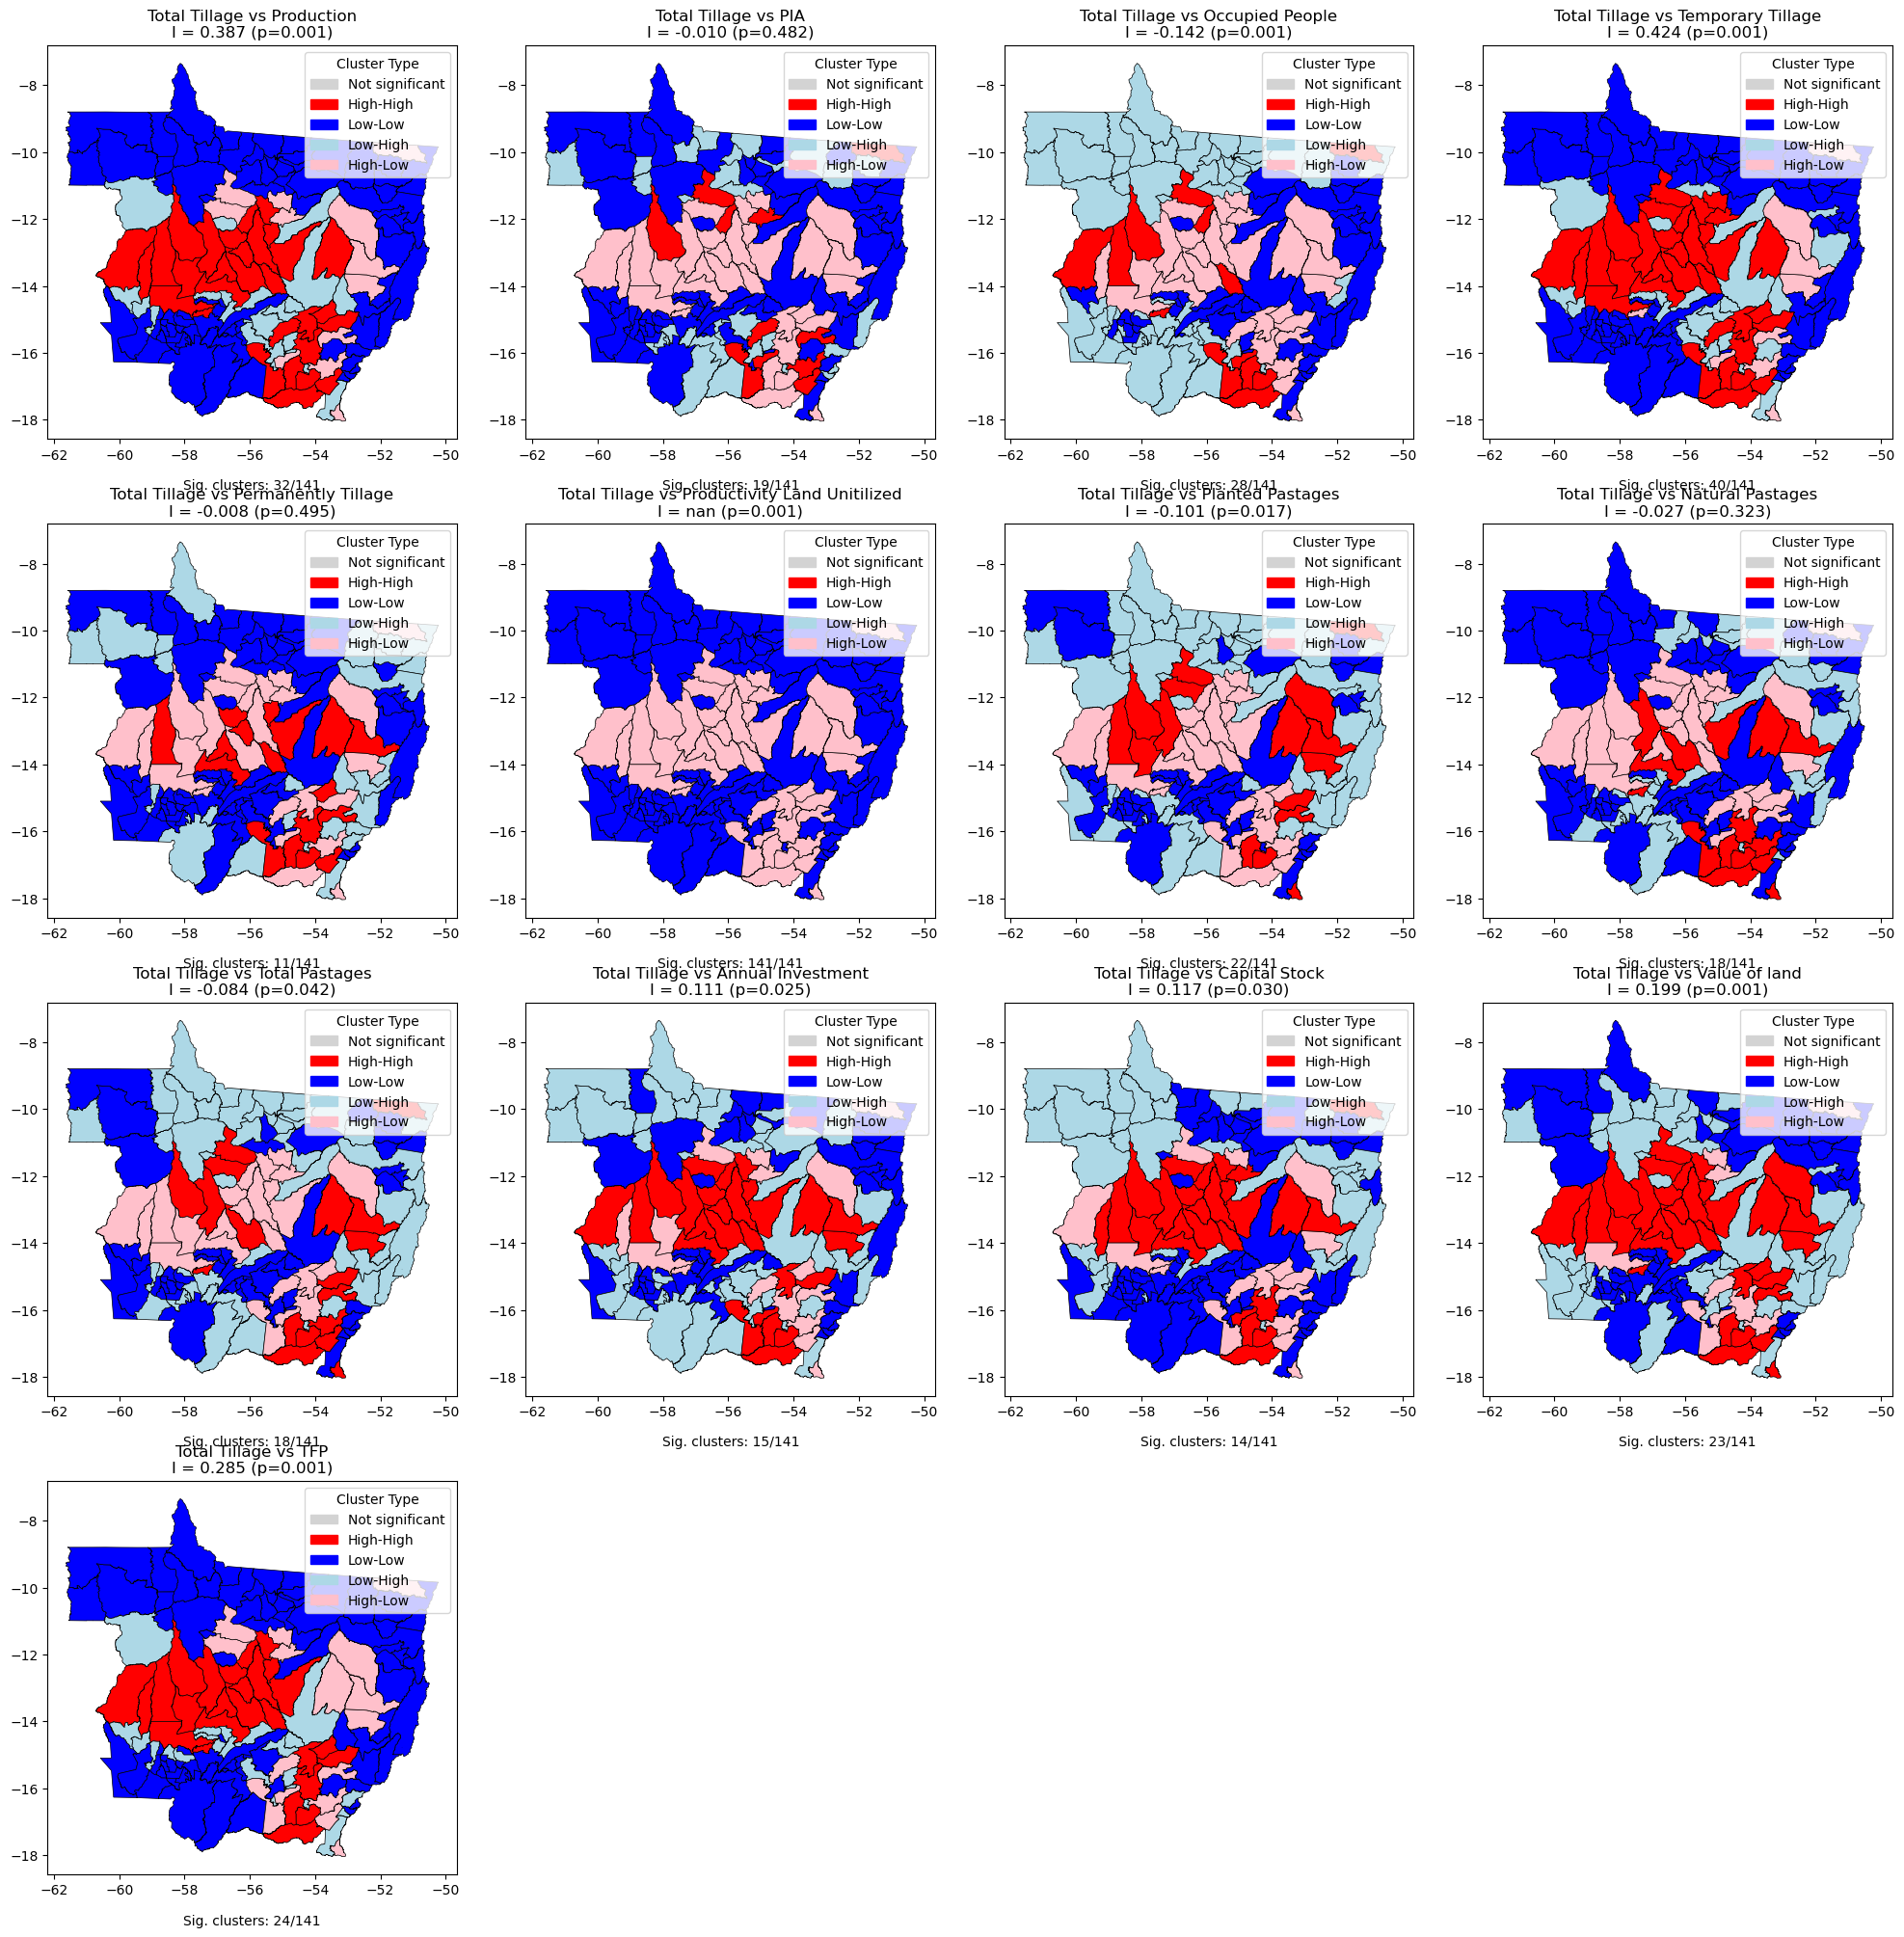

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from esda.moran import Moran_Local_BV, Moran_BV

# Variables to analyze - now including Production first
variables_to_test = ['Production'] + [
    'PIA', 'Occupied People', 'Temporary Tillage', 'Permanently Tillage',
    'Productivity Land Unitilized', 'Planted Pastages',
    'Natural Pastages', 'Total Pastages', 'Annual Investment', 'Capital Stock',
    'Value of land', 'TFP'
]
target_var = 'Total Tillage'

# Create figure with subplots
n_cols = 4
n_rows = int(np.ceil(len(variables_to_test)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

# Custom color mapping as specified
lisa_categories = {
    'Not significant': 'lightgrey',
    'High-High': 'red',
    'Low-Low': 'blue',
    'Low-High': 'lightblue',
    'High-Low': 'pink'
}

# Create mapping from cluster numbers to categories
cluster_mapping = {
    0: 'Not significant',
    1: 'High-High',
    2: 'Low-High',
    3: 'Low-Low',
    4: 'High-Low'
}

# Calculate and plot bivariate LISA for each variable
for i, var in enumerate(variables_to_test):
    y = merged[target_var].values
    x = merged[var].values
    
    # Calculate bivariate Moran's I
    moran_bv = Moran_BV(y, x, W)
    
    # Calculate bivariate LISA
    moran_loc_bv = Moran_Local_BV(y, x, W, permutations=9999)
    
    # Map cluster numbers to categories
    merged['lisa_category'] = [cluster_mapping[q] for q in moran_loc_bv.q]
    
    # Create color vector
    colors_list = [lisa_categories[cat] for cat in merged['lisa_category']]
    
    # Plot
    merged.plot(
        color=colors_list,
        linewidth=0.5,
        ax=axes[i],
        edgecolor='black'
    )
    
    # Create custom legend
    patches = [
        mpatches.Patch(color=color, label=label) 
        for label, color in lisa_categories.items()
    ]
    axes[i].legend(
        handles=patches,
        loc='upper right',
        title='Cluster Type'
    )
    
    # Add title with statistics
    axes[i].set_title(f'{target_var} vs {var}\nI = {moran_bv.I:.3f} (p={moran_bv.p_sim:.3f})', 
                     fontsize=12)
    
    # Add number of significant clusters
    sig = moran_loc_bv.p_sim < 0.05
    n_sig = sum(sig)
    axes[i].text(0.5, -0.1, f'Sig. clusters: {n_sig}/{len(y)}', 
                ha='center', va='top', transform=axes[i].transAxes, fontsize=10)

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

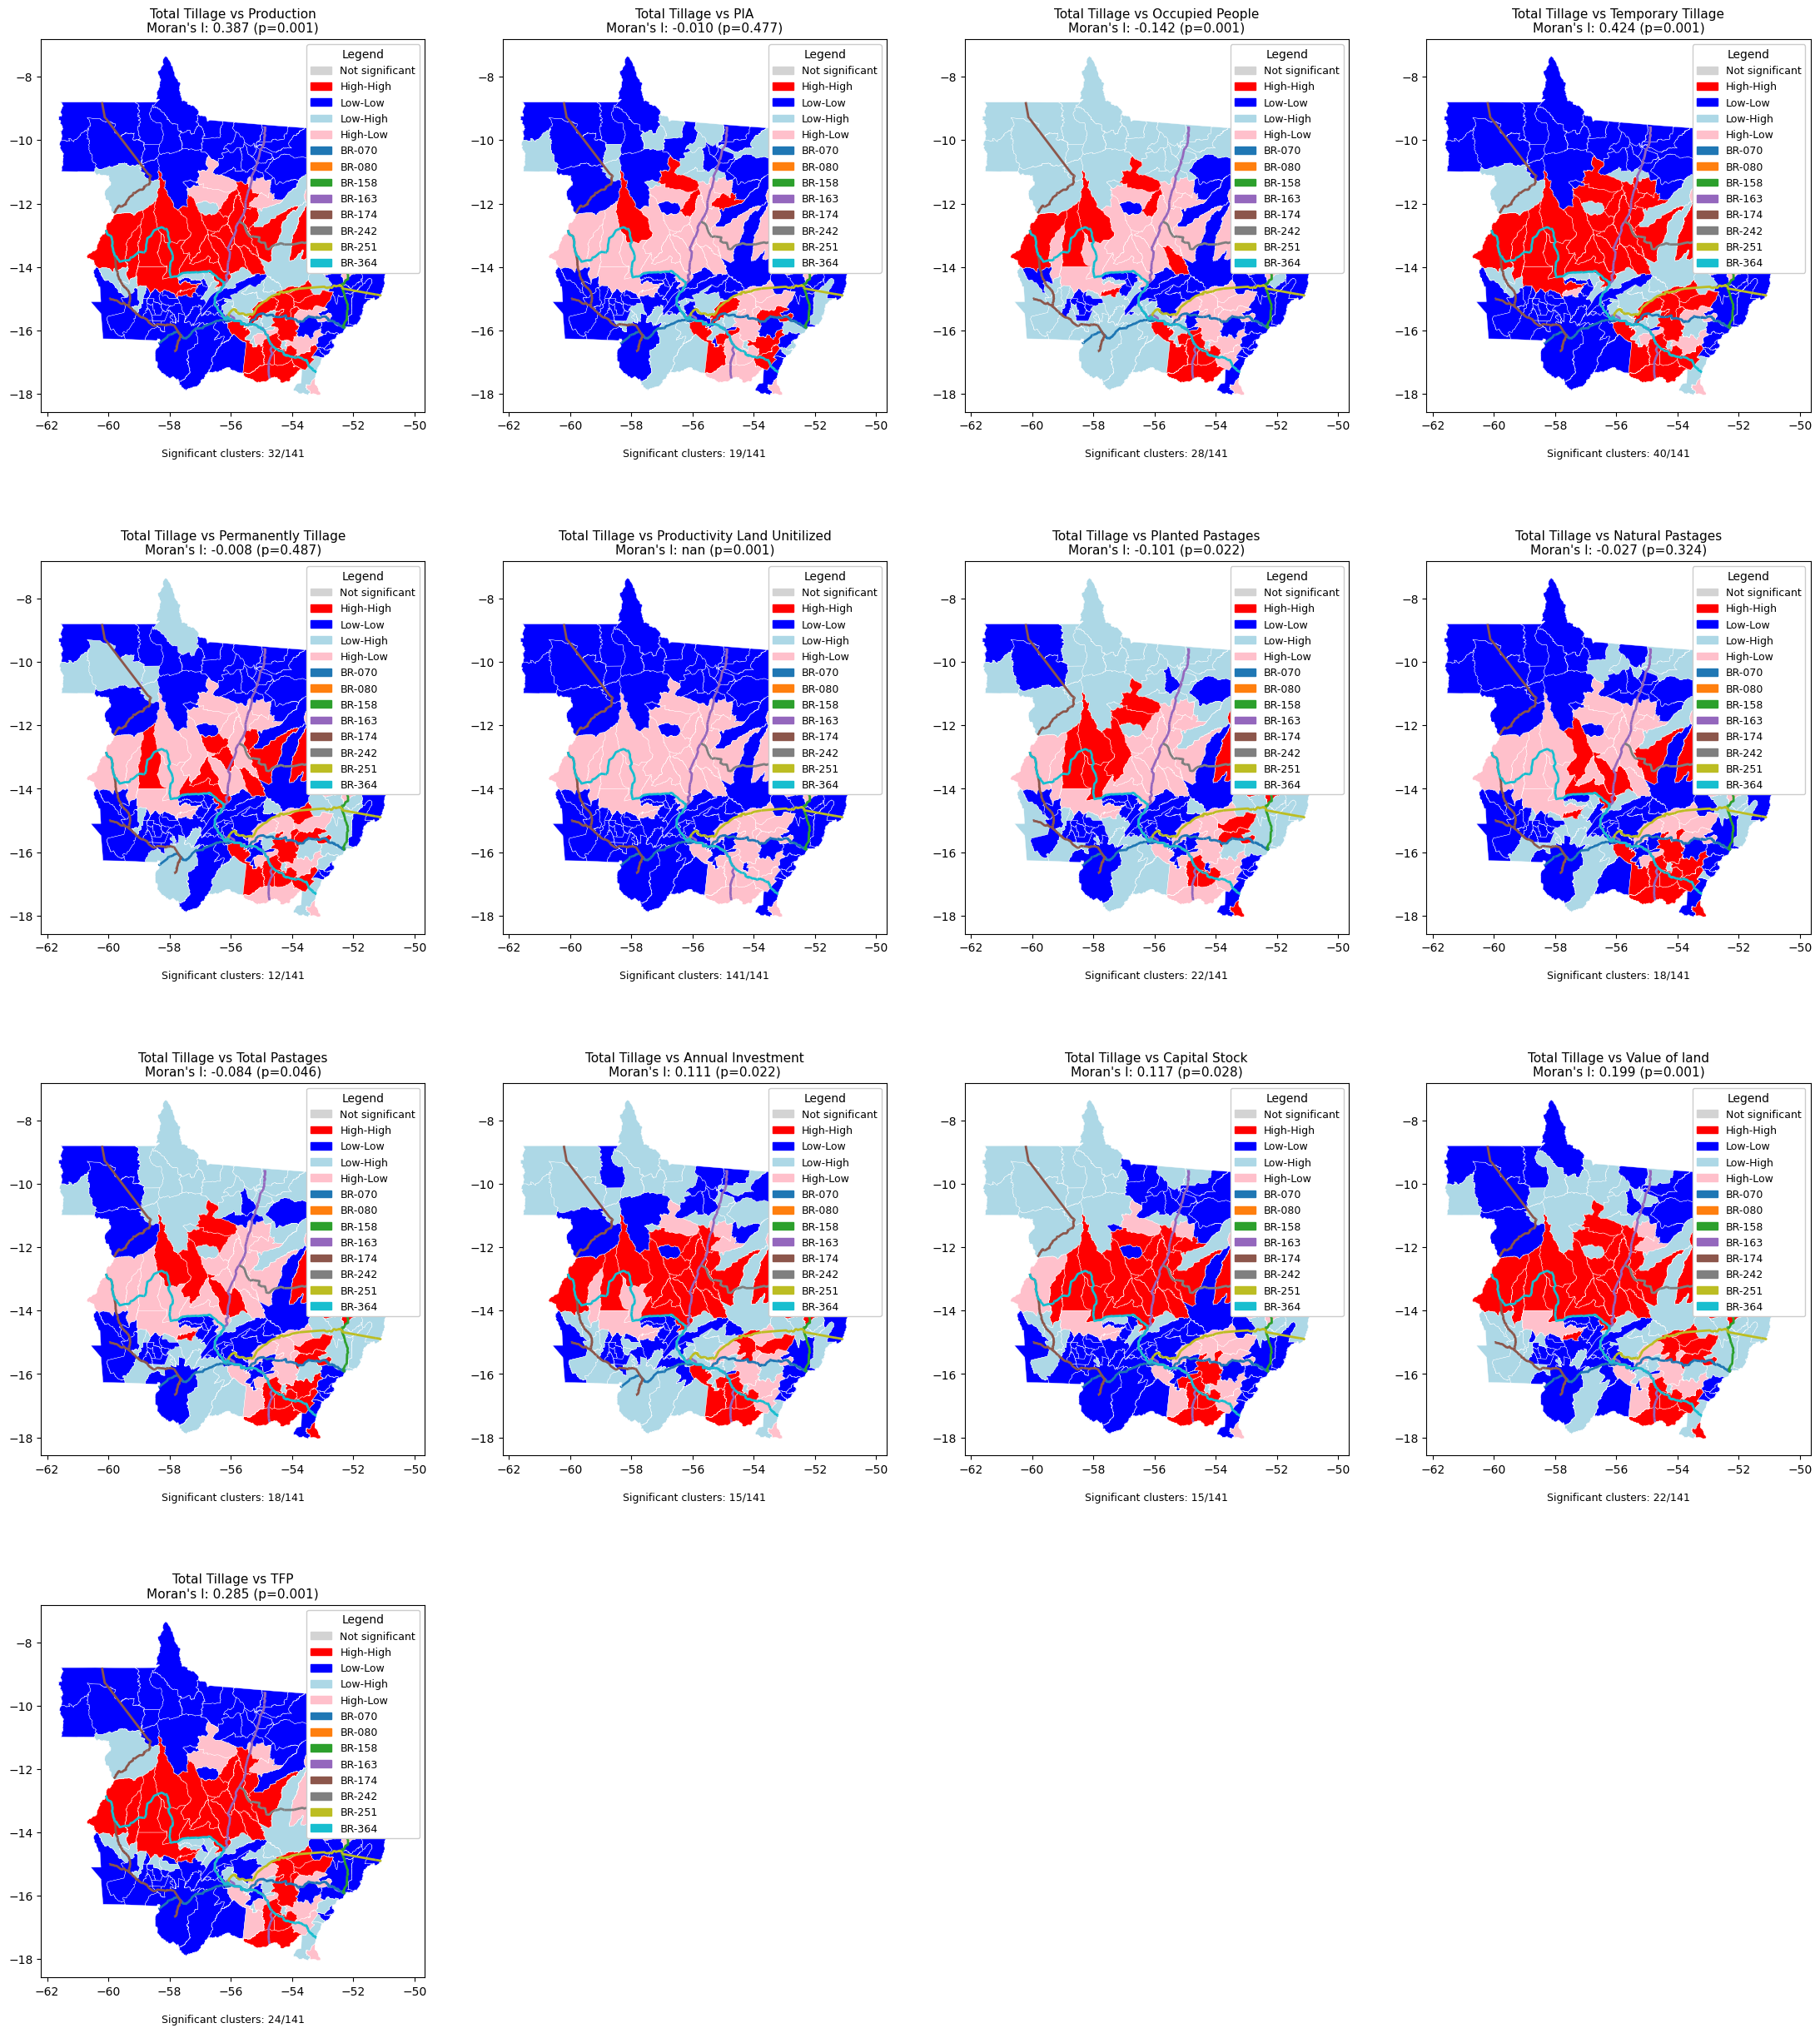

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from esda.moran import Moran_Local_BV, Moran_BV
import numpy as np

# Variables to analyze - Production first, then others
variables_to_test = ['Production'] + [
    'PIA', 'Occupied People', 'Temporary Tillage', 'Permanently Tillage',
    'Productivity Land Unitilized', 'Planted Pastages',
    'Natural Pastages', 'Total Pastages', 'Annual Investment', 'Capital Stock',
    'Value of land', 'TFP'
]
target_var = 'Total Tillage'

# Create figure with subplots
n_cols = 4
n_rows = int(np.ceil(len(variables_to_test)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 6*n_rows))
axes = axes.flatten()

# Custom color mapping for LISA clusters
lisa_categories = {
    'Not significant': 'lightgrey',
    'High-High': 'red',
    'Low-Low': 'blue',
    'Low-High': 'lightblue',
    'High-Low': 'pink'
}

# Cluster number to category mapping
cluster_mapping = {
    0: 'Not significant',
    1: 'High-High',
    2: 'Low-High',
    3: 'Low-Low',
    4: 'High-Low'
}

# Get unique highway classes and assign colors
highway_classes = sorted(highways_mt['vl_br'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(highway_classes)))

# Create highway style dictionary
highway_styles = {br: {'color': colors[i], 'linewidth': 2} 
                 for i, br in enumerate(highway_classes)}

for i, var in enumerate(variables_to_test):
    # Calculate statistics
    y = merged[target_var].values
    x = merged[var].values
    moran_bv = Moran_BV(y, x, W)
    moran_loc_bv = Moran_Local_BV(y, x, W, permutations=9999)
    
    # Prepare cluster colors
    merged['lisa_category'] = [cluster_mapping[q] for q in moran_loc_bv.q]
    colors_list = [lisa_categories[cat] for cat in merged['lisa_category']]
    
    # Plot clusters
    base = merged.plot(
        color=colors_list,
        linewidth=0.3,
        ax=axes[i],
        edgecolor='white'
    )
    
    # Plot each highway class with different color
    for br, style in highway_styles.items():
        highways_mt[highways_mt['vl_br'] == br].plot(
            ax=base,
            **style
        )
    
    # Create combined legend
    legend_elements = [
        mpatches.Patch(color='lightgrey', label='Not significant'),
        mpatches.Patch(color='red', label='High-High'),
        mpatches.Patch(color='blue', label='Low-Low'),
        mpatches.Patch(color='lightblue', label='Low-High'),
        mpatches.Patch(color='pink', label='High-Low')
    ]
    
    # Add highway legend items
    for class_val, color in zip(highway_classes, colors):
        legend_elements.append(
            mpatches.Patch(color=color, label=f'BR-{class_val}'))
    
    axes[i].legend(
        handles=legend_elements,
        loc='upper right',
        title='Legend',
        framealpha=1,
        fontsize=9
    )
    
    # Add title and statistics
    axes[i].set_title(f'{target_var} vs {var}\nMoran\'s I: {moran_bv.I:.3f} (p={moran_bv.p_sim:.3f})', 
                    fontsize=11)
    
    # Add significance info
    sig_count = sum(moran_loc_bv.p_sim < 0.05)
    axes[i].text(0.5, -0.12, 
                f'Significant clusters: {sig_count}/{len(y)}',
                transform=axes[i].transAxes,
                ha='center',
                fontsize=9)

# Hide empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

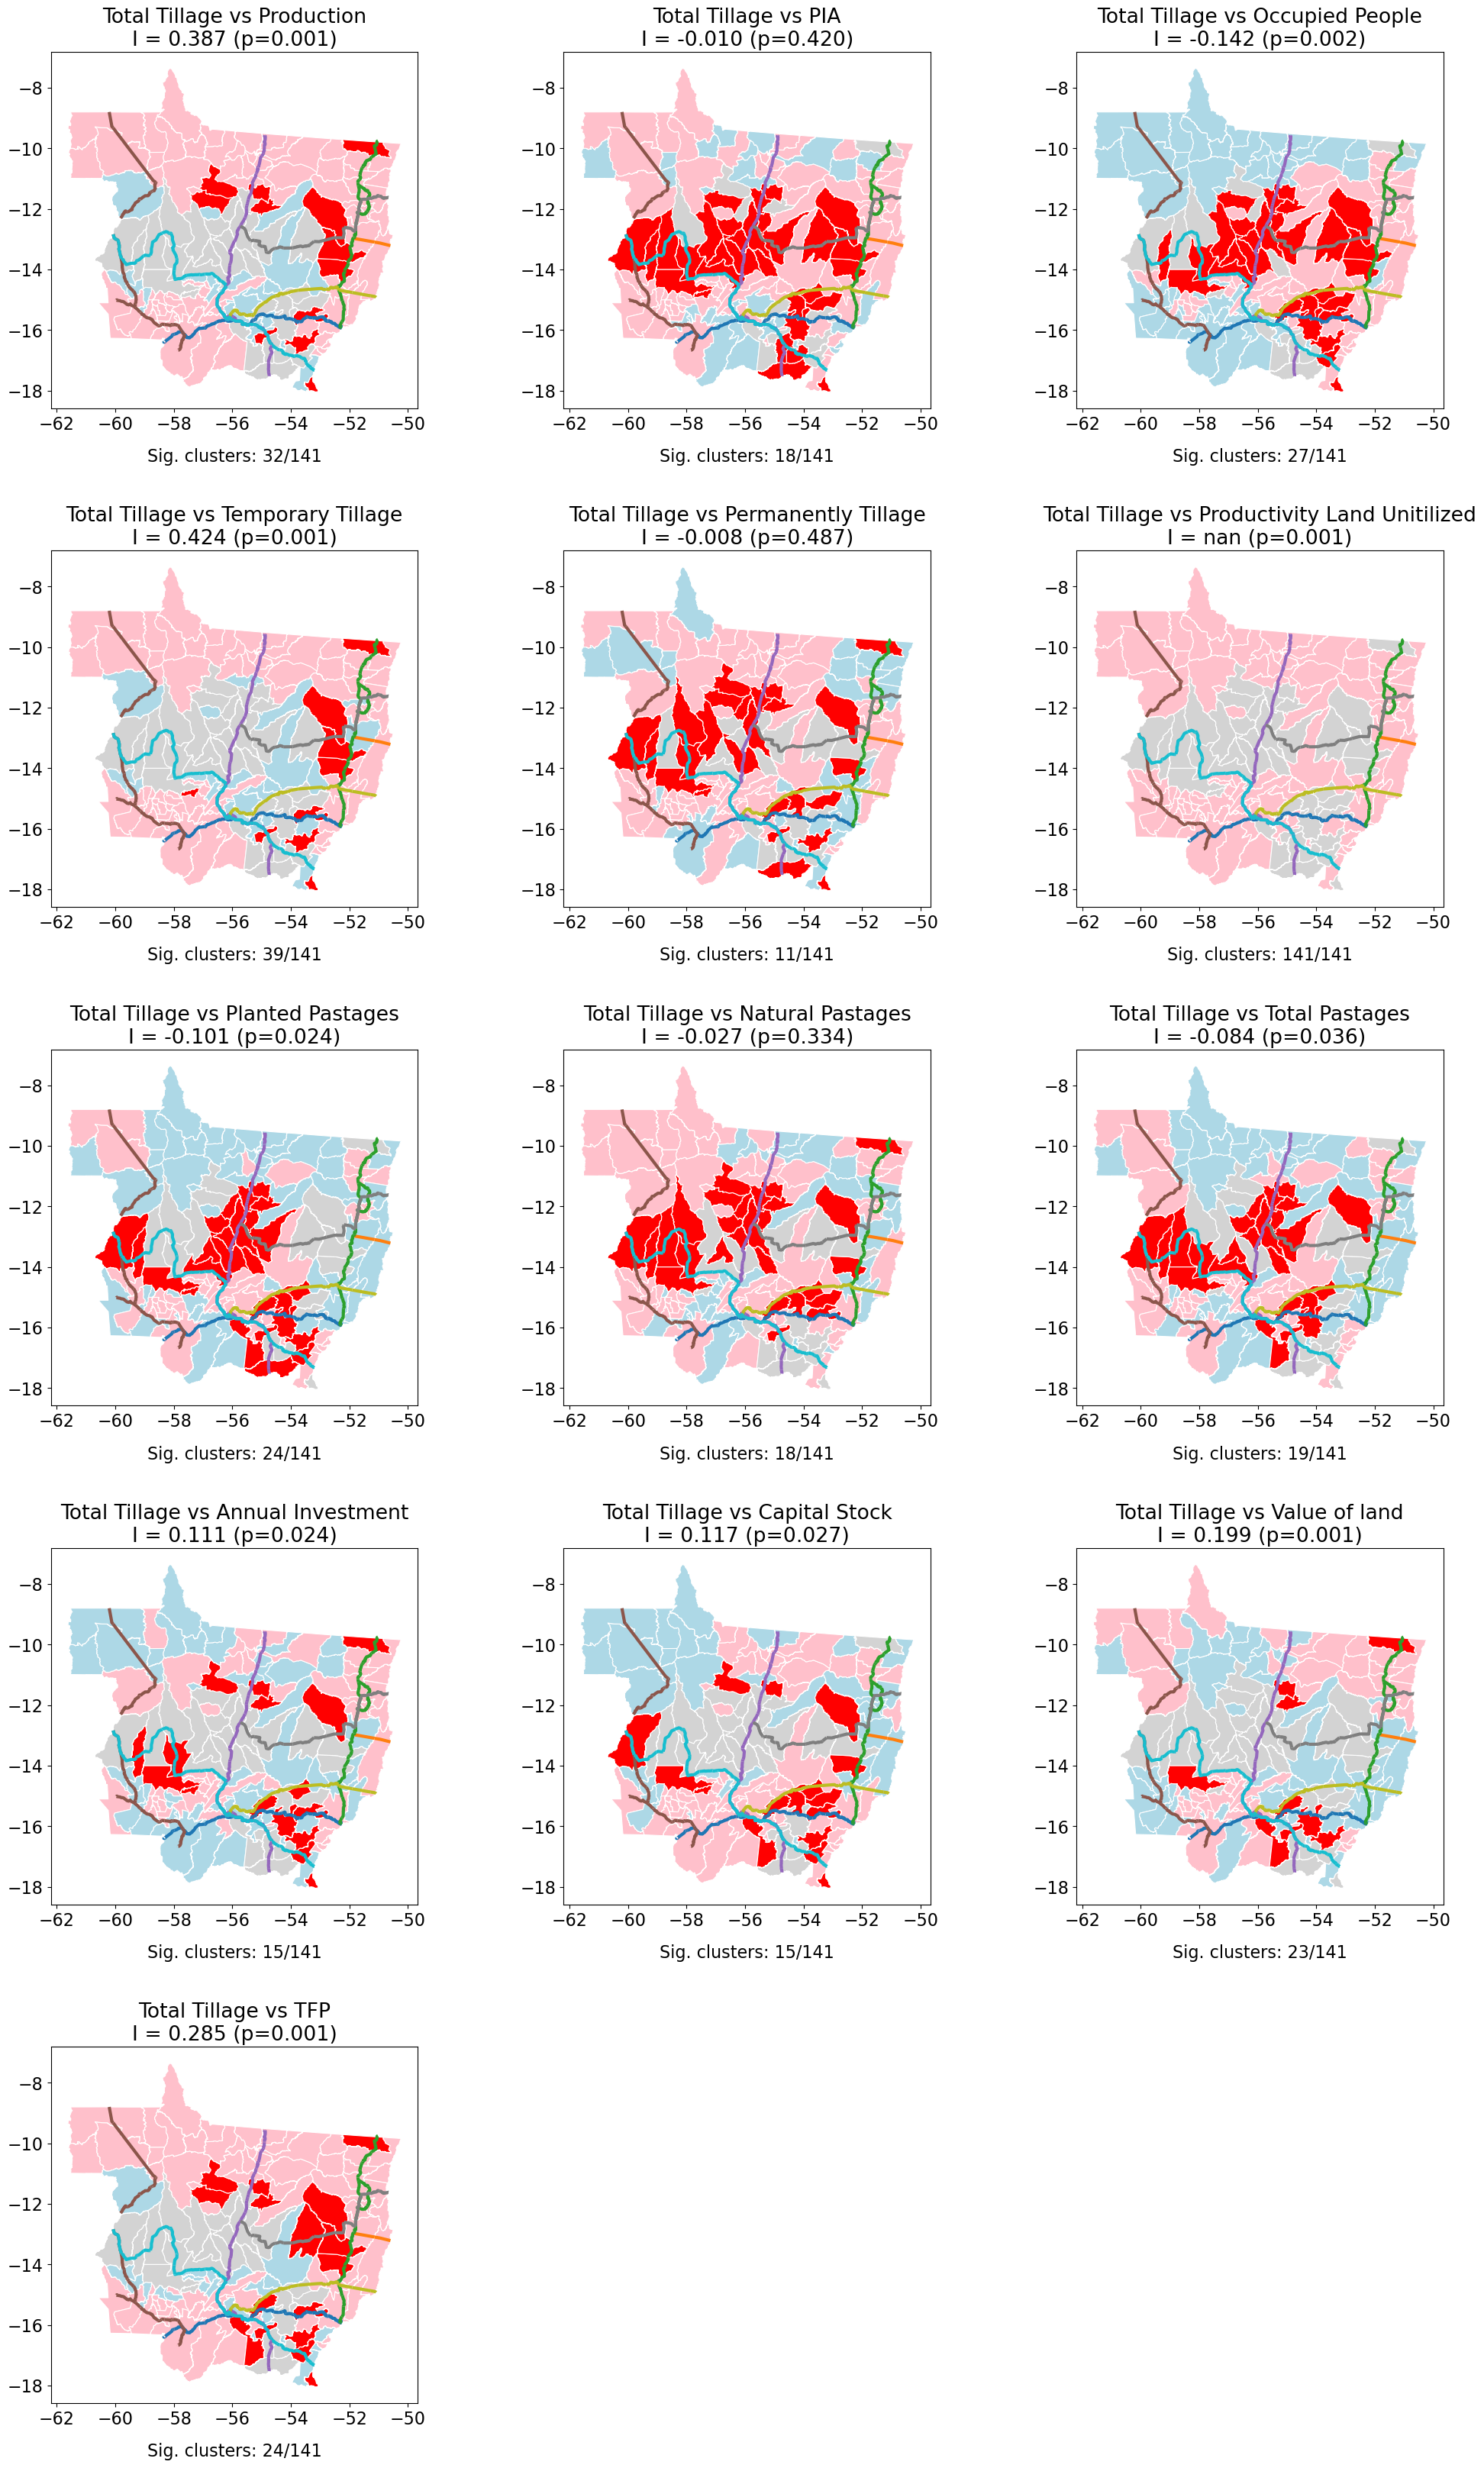

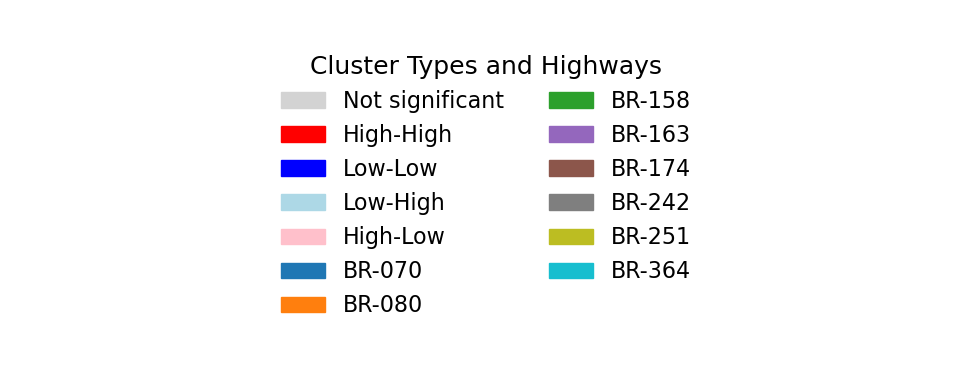

C:\Users\daves\AppData\Local\Temp\ipykernel_22964\2939263534.py:109: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  legend_fig.show()


In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from esda.moran import Moran_Local_BV, Moran_BV
import numpy as np

# Set default font size
plt.rcParams.update({'font.size': 16})

# Variables to analyze
variables_to_test = ['Production'] + [
    'PIA', 'Occupied People', 'Temporary Tillage', 'Permanently Tillage',
    'Productivity Land Unitilized', 'Planted Pastages',
    'Natural Pastages', 'Total Pastages', 'Annual Investment', 'Capital Stock',
    'Value of land', 'TFP'
]
target_var = 'Total Tillage'

# Create figure with subplots
n_cols = 3
n_rows = int(np.ceil(len(variables_to_test)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 8*n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Color mappings
lisa_categories = {
    'Not significant': 'lightgrey',
    'High-High': 'red',
    'Low-Low': 'blue',
    'Low-High': 'lightblue',
    'High-Low': 'pink'
}
cluster_mapping = {
    0: 'Not significant',
    1: 'High-High',
    2: 'Low-High',
    3: 'Low-Low',
    4: 'High-Low'
}

# Get highway classes and colors
highway_classes = sorted(highways_mt['vl_br'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(highway_classes)))
highway_styles = {br: {'color': colors[i], 'linewidth': 3} 
                 for i, br in enumerate(highway_classes)}

# Create colormap for LISA categories
lisa_cmap = mcolors.ListedColormap(list(lisa_categories.values()))

# Plot all maps first
for i, var in enumerate(variables_to_test):
    clean_var = var.strip()
    y = merged[target_var].values
    x = merged[clean_var].values
    
    # Calculate statistics
    moran_bv = Moran_BV(y, x, W)
    moran_loc_bv = Moran_Local_BV(y, x, W, permutations=9999)
    
    # Plot clusters
    merged['lisa_category'] = [cluster_mapping[q] for q in moran_loc_bv.q]
    base = merged.plot(
        column='lisa_category',
        categorical=True,
        cmap=lisa_cmap,
        linewidth=0.8,
        ax=axes[i],
        edgecolor='white',
        legend=False
    )
    
    # Plot highways
    for br, style in highway_styles.items():
        highways_mt[highways_mt['vl_br'] == br].plot(ax=base, **style)
    
    # Add titles
    axes[i].set_title(f'{target_var} vs {clean_var}\nI = {moran_bv.I:.3f} (p={moran_bv.p_sim:.3f})')
    axes[i].text(0.5, -0.15, f'Sig. clusters: {sum(moran_loc_bv.p_sim < 0.05)}/{len(y)}',
                transform=axes[i].transAxes, ha='center')

# Hide unused axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

# Create a separate figure for the legend
legend_fig = plt.figure(figsize=(10, 4))
legend_ax = legend_fig.add_subplot(111)
legend_ax.axis('off')

# Create legend elements
lisa_patches = [mpatches.Patch(color=color, label=label) 
               for label, color in lisa_categories.items()]
highway_patches = [mpatches.Patch(color=colors[i], label=f'BR-{br}')
                  for i, br in enumerate(highway_classes)]

# Combine and display legend
combined_patches = lisa_patches + highway_patches
legend = legend_ax.legend(handles=combined_patches, 
                         loc='center', 
                         ncol=2,
                         frameon=False,
                         title="Cluster Types and Highways")
plt.setp(legend.get_title(), fontsize=18)

# Adjust layout and show
plt.tight_layout()
plt.show()
legend_fig.show()